In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
import plotly.figure_factory as ff
import country_converter as coco

%matplotlib inline

**Importing Libraries and Dependencies**

**Loading Data**

In [31]:
salary_df = pd.read_csv('/Users/yashds/Downloads/salary analysis/dsy_salaries.csv')
salary_df = salary_df.drop(columns = ['Unnamed: 0', 'salary_currency', 'salary', 'remote_ratio'],axis = 1)
salary_df = salary_df.loc[salary_df['employment_type'] == 'FT'].copy()

# strip column whitespace 
salary_df.columns = salary_df.columns.str.replace(' ', '')
salary_df

# 50 different job titles
# dropped 22 values so we only consider FT employees

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size
0,2020.0,MI,FT,Data Scientist,79833.0,DE,DE,L
1,2020.0,SE,FT,Machine Learning Scientist,260000.0,JP,JP,S
2,2020.0,SE,FT,Big Data Engineer,109024.0,GB,GB,M
3,2020.0,MI,FT,Product Data Analyst,20000.0,HN,HN,S
4,2020.0,SE,FT,Machine Learning Engineer,150000.0,US,US,L
...,...,...,...,...,...,...,...,...
602,2022.0,SE,FT,Data Engineer,154000.0,US,US,M
603,2022.0,SE,FT,Data Engineer,126000.0,US,US,M
604,2022.0,SE,FT,Data Analyst,129000.0,US,US,M
605,2022.0,SE,FT,Data Analyst,150000.0,US,US,M


In [32]:
# formatting columns slightly to make it easier to interpret
exp_level = {'SE': 'Senior', 'MI': 'Mid', 'EN': 'Entry', 'EX': 'Executive'}
comp_size = {'L': 'Large', 'M': 'Medium', 'S': 'Small'}

salary_df['company_size'] = salary_df['company_size'].astype(str)
salary_df['experience_level'] = salary_df['experience_level'].astype(str)

salary_df['company_size'] = salary_df['company_size'].map(comp_size)
salary_df['experience_level'] = salary_df['experience_level'].map(exp_level)
salary_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size
0,2020.0,Mid,FT,Data Scientist,79833.0,DE,DE,Large
1,2020.0,Senior,FT,Machine Learning Scientist,260000.0,JP,JP,Small
2,2020.0,Senior,FT,Big Data Engineer,109024.0,GB,GB,Medium
3,2020.0,Mid,FT,Product Data Analyst,20000.0,HN,HN,Small
4,2020.0,Senior,FT,Machine Learning Engineer,150000.0,US,US,Large
...,...,...,...,...,...,...,...,...
602,2022.0,Senior,FT,Data Engineer,154000.0,US,US,Medium
603,2022.0,Senior,FT,Data Engineer,126000.0,US,US,Medium
604,2022.0,Senior,FT,Data Analyst,129000.0,US,US,Medium
605,2022.0,Senior,FT,Data Analyst,150000.0,US,US,Medium


In [25]:
pip install country_converter

Note: you may need to restart the kernel to use updated packages.


In [41]:
# convert residence/company location to ISO3 values to make them easier to read and plot

# Convert residence location to ISO3
country_conversion = coco.convert(names=salary_df['employee_residence'], to='ISO3')
salary_df['employee_residence'] = country_conversion

# Convert company location to ISO3
country_conversion1 = coco.convert(names=salary_df['company_location'], to='ISO3')
salary_df['company_location'] = country_conversion1


**Distribution of Work Years**
* over half of the data is from 2022, with second highest being 2021, and finally the lowest pct in 2020

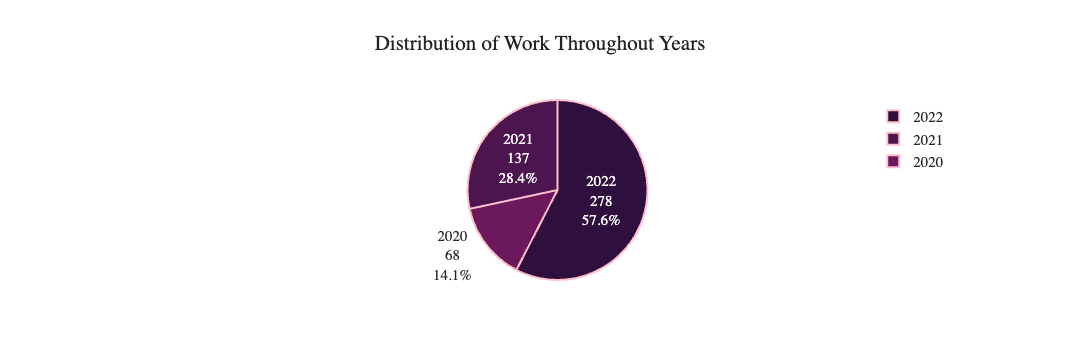

In [46]:
work_year = salary_df['work_year'].value_counts()

fig = px.pie(values = work_year.values, 
             names = work_year.index,
             color_discrete_sequence = px.colors.sequential.matter_r, 
             title = 'Distribution of Work Throughout Years', 
             template = 'seaborn')

fig.update_traces(textinfo = 'value+label+percent', textfont_size = 15, 
                  marker = dict(line = dict(color = '#100000', width = 0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = 'Pink'
fig.update_layout(
    font = dict(size = 15, family = "Franklin Gothic"))

fig.show()

**Distribution of Experience Level
included both total count and percentage of whole workforce**

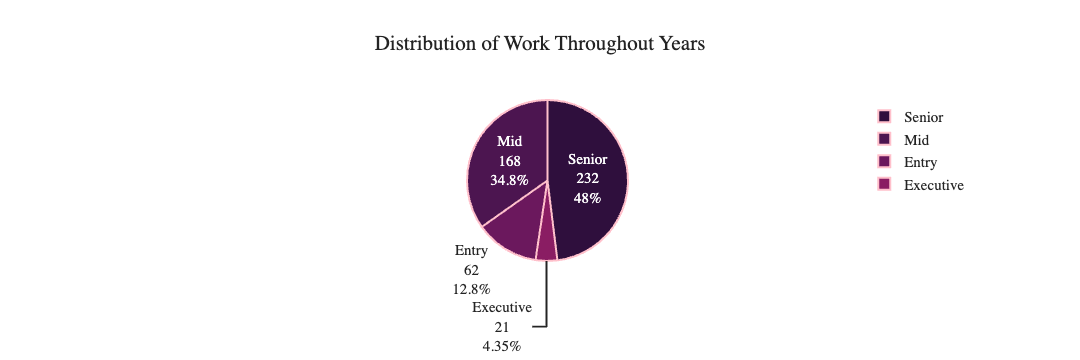

In [48]:
experience_level = salary_df['experience_level'].value_counts()

fig = px.pie(values = experience_level.values, 
             names = experience_level.index,
             color_discrete_sequence = px.colors.sequential.matter_r, 
             title = 'Distribution of Work Throughout Years', 
             template = 'seaborn')

fig.update_traces(textinfo = 'value+label+percent', textfont_size = 15, 
                  marker = dict(line = dict(color = '#100000', width = 0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = 'pink'
fig.update_layout(
    font = dict(size = 15, family = "Franklin Gothic"))

fig.show()

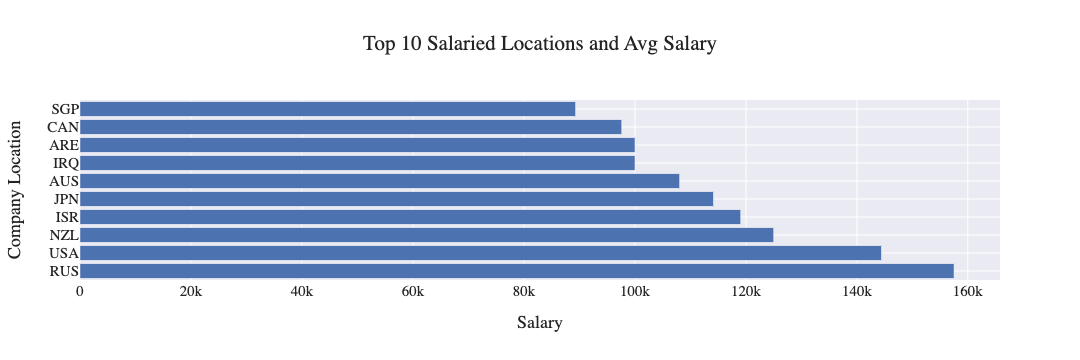

In [51]:
df_mean = salary_df.groupby('company_location')[['salary_in_usd']].mean().sort_values('salary_in_usd', ascending = False,).head(10)

fig = px.bar(df_mean,
             x = df_mean['salary_in_usd'],
             y = df_mean.index,
             title = "Top 10 Salaried Locations and Avg Salary",
             template = 'seaborn')

fig.update_layout(
    xaxis_title = "Salary", 
    yaxis_title = "Company Location",
    font = dict(size = 15, family = "Franklin Gothic"))
fig.show()

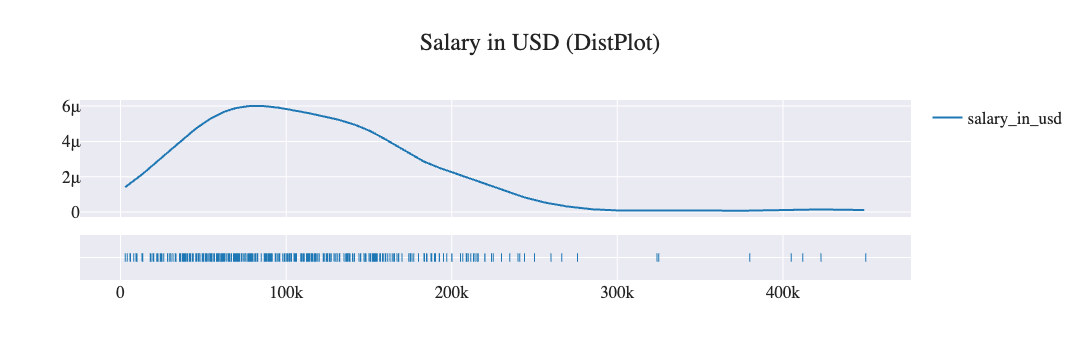

In [54]:
hist_data = [salary_df['salary_in_usd']] 
group_labels = ['salary_in_usd']

fig = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig.layout.template = 'seaborn'
fig.update_layout(title='Salary in USD (DistPlot)', font = dict(size=17, family="Franklin Gothic")) 
fig.show()

# As we can tell from the dist plot, most of the salaries fall between 75-150k

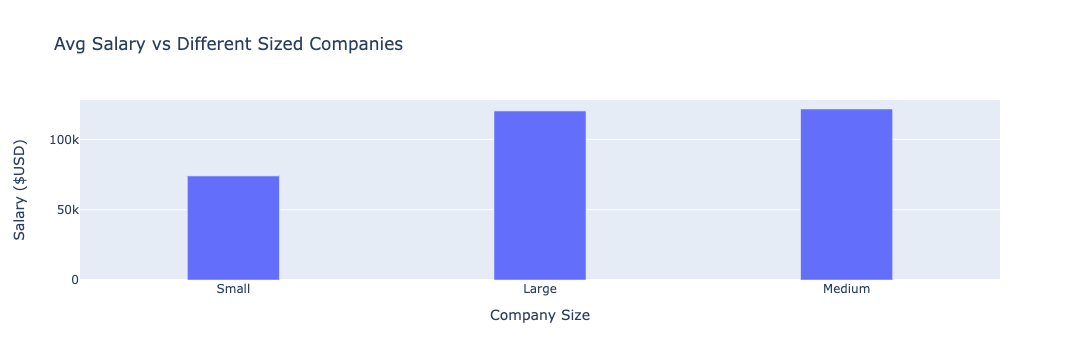

In [55]:

# based on this there doesn't seem to be much of a tradeoff between working at a medium vs large company in terms of salary
# the smaller companies average much lower salaries which makes sense
grouped_companies = salary_df.groupby('company_size')[['salary_in_usd']].mean().sort_values('salary_in_usd')

fig = px.bar(grouped_companies, x = grouped_companies.index, y = grouped_companies['salary_in_usd'], title = 'Avg Salary vs Different Sized Companies',
            labels = {
                "salary_in_usd": "Salary ($USD)",
                "company_size": "Company Size"
            })
fig.update_traces(width = 0.3)
fig.show()

In [56]:
# some of the most lucrative careers based on title (top 10)
job_grouped = salary_df.groupby('job_title')[['salary_in_usd']].mean().sort_values('salary_in_usd', ascending = False)[:10]
highest_paid = job_grouped.sort_values('salary_in_usd', ascending = False)

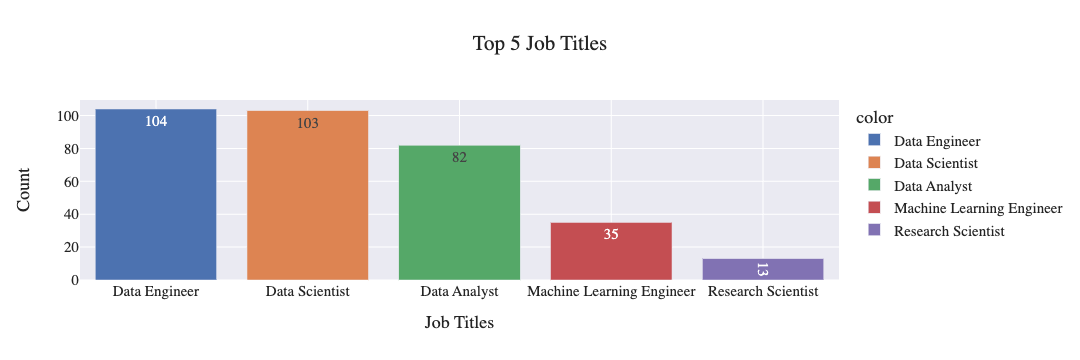

In [58]:
# now we will look at the most popular job titles based on frequency in the dataset 
top_5_jobs = salary_df['job_title'].value_counts()[:5]
fig = px.bar(y = top_5_jobs.values, 
    x = top_5_jobs.index, 
    color = top_5_jobs.index, 
    text = top_5_jobs.values, 
    title = 'Top 5 Job Titles',
    template = 'seaborn')

fig.update_layout( 
    xaxis_title = 'Job Titles', 
    yaxis_title = 'Count',
    font = dict(size = 15, family = "Franklin Gothic"))

fig.show()

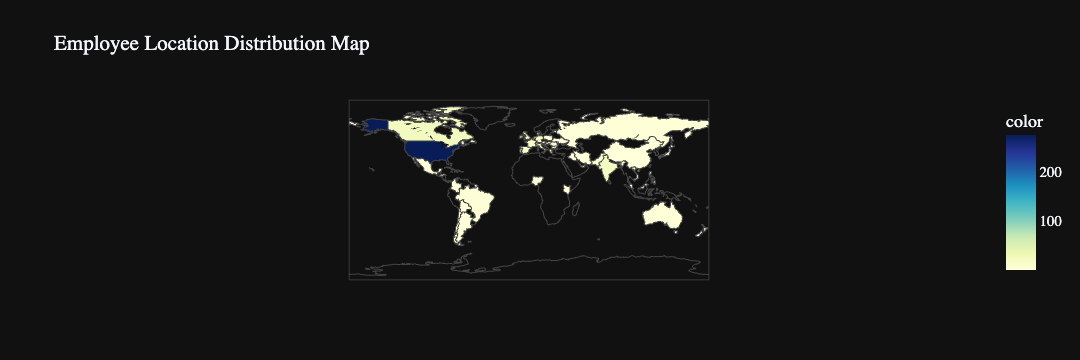

In [59]:
# density map - shows location of employee residences
residence = salary_df['employee_residence'].value_counts()

fig = px.choropleth(locations = residence.index, 
                    color = residence.values, 
                    color_continuous_scale = px.colors.sequential.YlGnBu, 
                    template = 'plotly_dark', 
                    title = 'Employee Location Distribution Map')

fig.update_layout(font = dict(size = 15, family = "Franklin Gothic"))
fig.show()

**Top 5 Employee Locations
depicts density of workforce based on employee residence
vast majority of the workforce in the dataset is concentrated in USA**

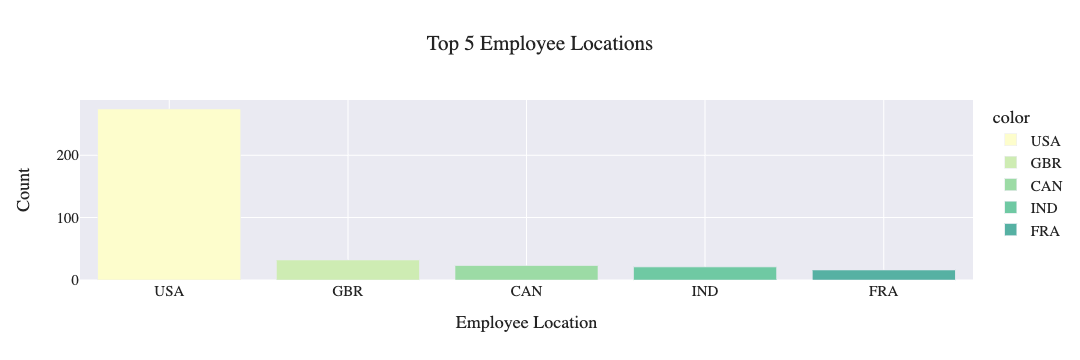

In [61]:
top_5_location = residence[:5] 

fig = px.bar(y = top_5_location.values, 
             x = top_5_location.index, 
             color = top_5_location.index, 
             color_discrete_sequence = px.colors.sequential.deep, 
             title = 'Top 5 Employee Locations', 
             template = 'seaborn')

fig.update_layout(

    xaxis_title = "Employee Location", 
    yaxis_title = "Count", 
    font = dict(size = 15, family = "Franklin Gothic"))

fig.show()